In [322]:
cd C:\Users\Amy\Google Drive\WCAI Research Project\VPS Data (Amy)

C:\Users\Amy\Google Drive\WCAI Research Project\VPS Data (Amy)


In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# VPS_POS_ORDERS
###A single Subway transaction paid for with a credit card or loyalty card

In [360]:
vps = pd.read_csv('VPS_POS_ORDERS_VPS_CUSTOMER_SMP.csv', index_col=0)
vps.head()

C:\Users\Amy\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash
7371,621-86-591992,7264,7/1/2013,11.03,1,USD,bkTVSOWyx1kzuv1XcUHHy31qepI=
8845,685-81-681403,44247,7/1/2013,12.49,1,USD,lHErKbQV0xf+xWhSE1z6+gtb71U=
31881,686-100-709580,4828,7/1/2013,4.89,1,USD,zHjrK01SOr8SLemUI9UmUpL9Qg8=
37041,686-100-741042,48671,7/1/2013,33.86,1,USD,X4UxGP36ffBB9LTLp5349f33lCw=
37149,624-100-583263,32341,7/1/2013,4.35,1,USD,19/+y2432BWOoRZWcgtMUG41bik=


In [361]:
vps.shape

(696927, 7)

In [362]:
vps.dtypes

pos_order_id           object
pos_order_number       object
pos_order_date         object
approved_amount       float64
currency_type_id        int64
currency_type_desc     object
cust_hash              object
dtype: object

In [363]:
vps['cust_hash']=vps['cust_hash'].astype(str)

In [364]:
vps['currency_type_id']=vps['currency_type_id'].astype(object)
vps['pos_order_date']= pd.to_datetime(vps['pos_order_date'])

In [365]:
vps['dayofweek']=vps['pos_order_date'].dt.dayofweek

In [366]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

vps['dayofweek'] = vps['dayofweek'].apply(lambda x: days[x])

In [367]:
vps.head()

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
7371,621-86-591992,7264,2013-07-01,11.03,1,USD,bkTVSOWyx1kzuv1XcUHHy31qepI=,Mon
8845,685-81-681403,44247,2013-07-01,12.49,1,USD,lHErKbQV0xf+xWhSE1z6+gtb71U=,Mon
31881,686-100-709580,4828,2013-07-01,4.89,1,USD,zHjrK01SOr8SLemUI9UmUpL9Qg8=,Mon
37041,686-100-741042,48671,2013-07-01,33.86,1,USD,X4UxGP36ffBB9LTLp5349f33lCw=,Mon
37149,624-100-583263,32341,2013-07-01,4.35,1,USD,19/+y2432BWOoRZWcgtMUG41bik=,Mon


In [368]:
vps['currency_type_desc'].value_counts()

USD                                 692139
Points                                4788
dtype: int64

In [369]:
vps.dtypes

pos_order_id                  object
pos_order_number              object
pos_order_date        datetime64[ns]
approved_amount              float64
currency_type_id              object
currency_type_desc            object
cust_hash                     object
dayofweek                     object
dtype: object

In [370]:
vps.describe(include='all')

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
count,696927,696927,696927,696927.000000,696927,696927,696927,696927
unique,683519,152592,742,NaN,2,2,250000,7
top,686-181-96098,1,2015-04-30 00:00:00,NaN,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Thurs
freq,6,317,3555,NaN,692139,692139,353,112003
first,NaN,NaN,2013-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-14 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8.311229,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,12.002238,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-360.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,5.860000,NaN,NaN,NaN,NaN


There are negative values in the approved_amount column. Some reflect when customers redeem their points for a free cookie, for example. However, some are also negative $ transactions. Let's split the dataset into transactions that are points VS $. 

https://www.mysubwaycard.com/English/Terms/RewardsRedemption - shows point redemption options

In [371]:
vps_points=vps[vps.currency_type_id==2]
vps_points.head()

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
573776,687-99-103325,50347,2013-07-01,-65,2,Points,gM9Q/9ccy/pl1rRTs9Adi5vTr5I=,Mon
65110,623-81-749027,64644,2013-07-02,-125,2,Points,KBJmqfTrU0lXVMdznI7LCO0uGNo=,Tues
277266,623-81-745762,4867,2013-07-02,-50,2,Points,vYTjg8ktj/TuuHK4osjHDRZMR5Y=,Tues
435284,621-86-877830,26278,2013-07-02,-75,2,Points,b0Zos20oxFzDZQXCduq0bNHSOY8=,Tues
662950,623-81-735541,37069,2013-07-02,-75,2,Points,5OK8K/G+eepB7+WiBbd0G2p1do4=,Tues


In [372]:
vps_points.shape

(4788, 8)

In [373]:
vps_points.describe(include='all')

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
count,4788,4788,4788,4788.000000,4788,4788,4788,4788
unique,4779,4698,720,NaN,1,1,2179,7
top,622-179-1017104,10288,2015-05-01 00:00:00,NaN,2,Points,5/Rp5MNj2i5J8FqxpBFx0exz5o4=,Tues
freq,2,2,24,NaN,4788,4788,109,778
first,NaN,NaN,2013-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-14 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-68.330201,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,30.206188,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-360.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,-75.000000,NaN,NaN,NaN,NaN


In [374]:
vps_points['approved_amount'].describe()

count    4788.000000
mean      -68.330201
std        30.206188
min      -360.000000
25%       -75.000000
50%       -75.000000
75%       -50.000000
max       -10.000000
Name: approved_amount, dtype: float64

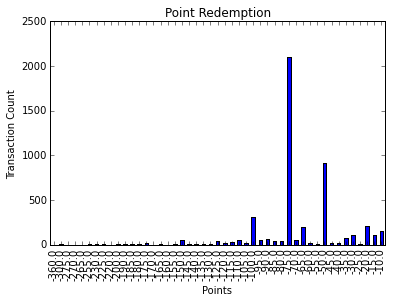

In [375]:
plt.xlabel('Points')
plt.ylabel('Transaction Count')
plt.title('Point Redemption')
vps_points['approved_amount'].value_counts(sort=False).plot(kind='bar')

In [376]:
vps_USD=vps[vps.currency_type_id==1]
vps_USD.shape

(692139, 8)

In [377]:
vps_USD.describe(include='all')

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
count,692139,692139,692139,692139.000000,692139,692139,692139,692139
unique,678768,151555,742,NaN,1,1,247918,7
top,686-181-96098,1,2015-04-30 00:00:00,NaN,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Thurs
freq,6,317,3544,NaN,692139,692139,353,111266
first,NaN,NaN,2013-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-14 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8.841411,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,9.890640,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-327.600000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,5.940000,NaN,NaN,NaN,NaN


In [378]:
vps_USD['approved_amount'].describe()

count    692139.000000
mean          8.841411
std           9.890640
min        -327.600000
25%           5.940000
50%           7.680000
75%          11.140000
max        2051.500000
Name: approved_amount, dtype: float64

In [379]:
# number of transactions with <=0 dollar amount 
(vps_USD['approved_amount']<=0).sum()

47584

In [380]:
(vps_USD['approved_amount']<0).sum()

47246

In [381]:
(vps_USD['approved_amount']==0).sum()

338

In [382]:
# Create a subset with <0 dollar amount 
vps_USD_neg=vps_USD[vps_USD.approved_amount<0]
vps_USD_neg.shape

(47246, 8)

In [383]:
vps_USD_neg.describe(include='all')

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
count,47246,47246,47246,47246.000000,47246,47246,47246,47246
unique,34292,27575,725,NaN,1,1,19383,7
top,686-181-96098,1,2014-12-29 00:00:00,NaN,1,USD,5Lmzh2nMhma42jJr3kyN1sc7qrQ=,Tues
freq,6,15,278,NaN,47246,47246,123,7529
first,NaN,NaN,2013-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-14 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-6.920722,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,5.870879,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-327.600000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,-9.200000,NaN,NaN,NaN,NaN


In [384]:
vps_USD_neg['approved_amount'].describe()

count    47246.000000
mean        -6.920722
std          5.870879
min       -327.600000
25%         -9.200000
50%         -5.910000
75%         -4.000000
max         -0.010000
Name: approved_amount, dtype: float64

In [385]:
# Create a subset with >0 dollar amount 
vps_USD_pos=vps_USD[vps_USD.approved_amount>0]
vps_USD_pos.shape

(644555, 8)

In [386]:
vps_USD_pos.describe(include='all')

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
count,644555,644555,644555,644555.000000,644555,644555,644555,644555
unique,644323,148756,742,NaN,1,1,231803,7
top,687-172-1021054,1,2015-04-30 00:00:00,NaN,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Thurs
freq,4,302,3345,NaN,644555,644555,353,103944
first,NaN,NaN,2013-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-14 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.001414,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,9.106182,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.010000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,6.350000,NaN,NaN,NaN,NaN


In [387]:
vps_USD_pos['approved_amount'].describe()

count    644555.000000
mean         10.001414
std           9.106182
min           0.010000
25%           6.350000
50%           8.050000
75%          11.580000
max        2051.500000
Name: approved_amount, dtype: float64

In [352]:
vps=vps.sort('pos_order_date')

In [394]:
vps.head(72)

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
7371,621-86-591992,7264,2013-07-01,11.03,1,USD,bkTVSOWyx1kzuv1XcUHHy31qepI=,Mon
8845,685-81-681403,44247,2013-07-01,12.49,1,USD,lHErKbQV0xf+xWhSE1z6+gtb71U=,Mon
31881,686-100-709580,4828,2013-07-01,4.89,1,USD,zHjrK01SOr8SLemUI9UmUpL9Qg8=,Mon
37041,686-100-741042,48671,2013-07-01,33.86,1,USD,X4UxGP36ffBB9LTLp5349f33lCw=,Mon
37149,624-100-583263,32341,2013-07-01,4.35,1,USD,19/+y2432BWOoRZWcgtMUG41bik=,Mon
40746,686-100-821134,15142,2013-07-01,11.98,1,USD,ikS5Lz3byLZB1aEPfhA+idUlEOY=,Mon
46775,685-81-735952,55254,2013-07-01,13.69,1,USD,8KyRdEN+xQ09B9agQF3lTozeiac=,Mon
76061,625-104-49828,47488,2013-07-01,4.28,1,USD,PFk86ahYOQavqxGqWfsbPeXCWv4=,Mon
79971,688-99-893191,47591,2013-07-01,8.15,1,USD,eTModTRjD5DgcfI+81vrtaRMpag=,Mon
83756,686-100-764281,11297,2013-07-01,5.62,1,USD,qJcigEl9cVZecMeg79LXZMTCtkg=,Mon


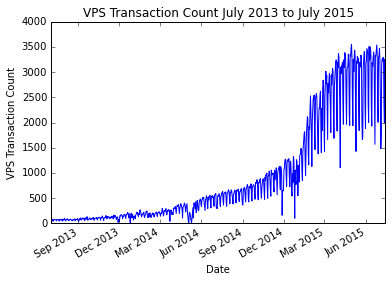

In [354]:
plt.xlabel('Date')
plt.ylabel('VPS Transaction Count')
plt.title('VPS Transaction Count July 2013 to July 2015')
vps['pos_order_date'].value_counts(sort=False).plot()

In [395]:
vps['pos_order_date'].value_counts()

2015-04-30    3555
2015-06-25    3542
2015-06-08    3511
2015-06-11    3500
2015-04-29    3483
2015-07-01    3475
2015-06-03    3471
2015-06-04    3440
2015-05-07    3437
2015-06-24    3426
2015-05-29    3409
2015-05-28    3407
2015-06-05    3405
2015-06-18    3402
2015-04-15    3389
2015-06-26    3379
2015-04-01    3373
2015-04-16    3366
2015-04-23    3361
2015-04-27    3347
2015-05-21    3339
2015-06-19    3337
2015-06-30    3328
2015-05-08    3327
2015-06-22    3326
2015-06-23    3320
2015-06-12    3317
2015-05-13    3314
2015-04-28    3310
2015-04-02    3310
              ... 
2013-07-25      64
2013-09-22      63
2013-08-24      63
2013-08-31      63
2013-08-20      63
2013-08-10      60
2013-10-27      59
2013-09-15      58
2013-08-11      57
2013-07-20      57
2013-08-25      57
2014-05-09      56
2013-08-04      54
2013-08-18      53
2013-08-03      51
2013-07-04      50
2013-07-14      50
2013-07-06      48
2013-09-01      48
2013-07-28      48
2013-07-21      47
2013-09-02  

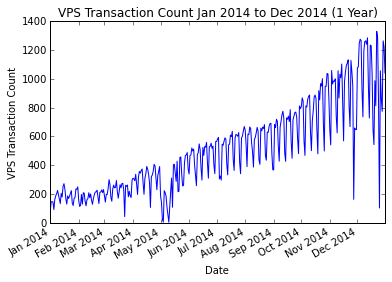

In [162]:
plt.xlabel('Date')
plt.ylabel('VPS Transaction Count')
plt.title('VPS Transaction Count Jan 2014 to Dec 2014 (1 Year)')
vps[(vps['pos_order_date'] >= '20140101') & (vps['pos_order_date'] <='2014-12-31')]['pos_order_date'].value_counts(sort=False).plot()

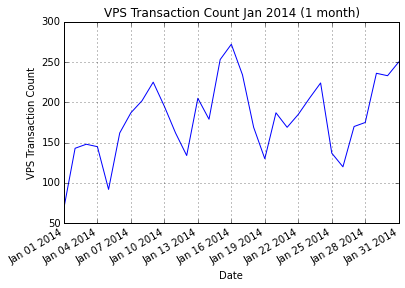

In [29]:
plt.xlabel('Date')
plt.ylabel('VPS Transaction Count')
plt.title('VPS Transaction Count Jan 2014 (1 month)')
#plt.grid(True)
vps[(vps['pos_order_date'] >= '20140101') & (vps['pos_order_date'] <='20140131')]['pos_order_date'].value_counts(sort=False).plot(grid=True)

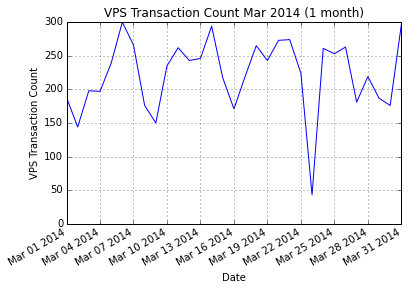

In [31]:
plt.xlabel('Date')
plt.ylabel('VPS Transaction Count')
plt.title('VPS Transaction Count Mar 2014 (1 month)')
#plt.grid(True)
vps[(vps['pos_order_date'] >= '20140301') & (vps['pos_order_date'] <='20140331')]['pos_order_date'].value_counts(sort=False).plot(grid=True)

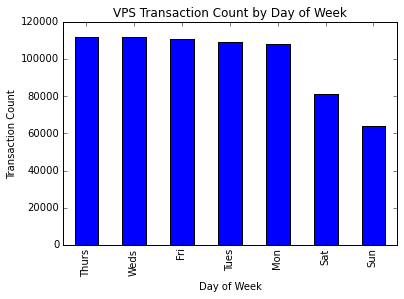

In [71]:
plt.xlabel('Day of Week')
plt.ylabel('Transaction Count')
plt.title('VPS Transaction Count by Day of Week')
vps['dayofweek'].value_counts().plot(kind='bar')

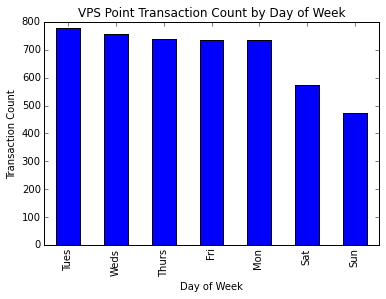

In [73]:
plt.xlabel('Day of Week')
plt.ylabel('Transaction Count')
plt.title('VPS Point Transaction Count by Day of Week')
vps_points['dayofweek'].value_counts().plot(kind='bar')

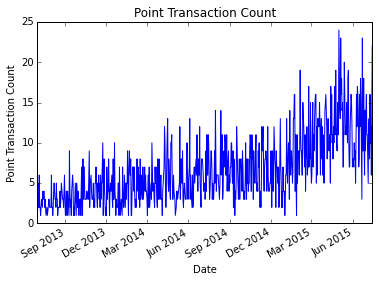

In [204]:
plt.xlabel('Date')
plt.ylabel('Point Transaction Count')
plt.title('Point Transaction Count')
vps_points['pos_order_date'].value_counts(sort=False).plot()

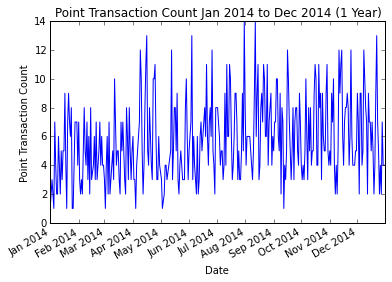

In [25]:
plt.xlabel('Date')
plt.ylabel('Point Transaction Count')
plt.title('Point Transaction Count Jan 2014 to Dec 2014 (1 Year)')
vps_points[(vps_points['pos_order_date'] >= '20140101') & (vps_points['pos_order_date'] <='2014-12-31')]['pos_order_date'].value_counts(sort=False).plot()

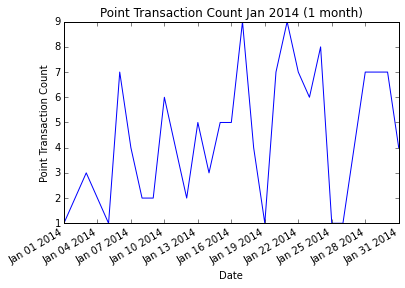

In [26]:
plt.xlabel('Date')
plt.ylabel('Point Transaction Count')
plt.title('Point Transaction Count Jan 2014 (1 month)')
vps_points[(vps_points['pos_order_date'] >= '20140101') & (vps_points['pos_order_date'] <='20140131')]['pos_order_date'].value_counts(sort=False).plot()

In [58]:
# Number of Transactions/customer
vps['cust_hash'].value_counts().describe()

count    250000.000000
mean          2.787708
std           4.599917
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         353.000000
dtype: float64

In [217]:
vps['cust_hash'].value_counts()

WDQIbzmC5Ek4qjqsDTA+GT+PwNw=        353
weD6LcRH7i9aJkJQud0Q1pxApwM=        271
YCW253rXAow5xq5Zt4fesk5Reds=        211
B6hZpSFDQB5wdELlrFhgm4uWIV8=        207
BGsg0VI2hGxyrSonS5Zm5MtSG2E=        180
zgrCGUHXyDM9hsorycJmARXTcIM=        162
U3uSuKYI8SAlEA509hgYVUfO43o=        160
ZhNYzIbvKuDY66fHJxenKRyHQEU=        159
kBwq1AvrE7Ir26BetWC2JBOUPfU=        157
S2f/rbIPUS2t1yjsJlxd4wuDgE8=        155
5Lmzh2nMhma42jJr3kyN1sc7qrQ=        154
DDwcO5ogwqMSpaaitIY0ZIx0C0Q=        150
8kSVZ9+IbPEHtqWq7Cg8JKvQ4cU=        142
N0zu6AjJ1ZfbOOMiTArVJVje6H0=        140
ObhHg1InvwsbUQBpwTMwDXiYbpQ=        131
ntzOFomw1PTURZyzXE1saa17W+U=        129
9bv7Hi3hgO2o7bspR9I8R0p15jU=        129
pwjbiRnwRtuDAm0bvSDo/OBp/Rk=        128
h0cAX3kzOTwrFCry9exBAxZJMks=        128
6RH83b03t70SLEuGPTfGFGmC7jg=        126
6er2APCfBI56Db0rO7IdiDbrlkM=        124
GLbw7aR+LImOtoy3LaU2w127pC4=        124
+RADYyJWBweP/EGOtx1Hevgp1d0=        116
mO8lAT4bpwEF+pP7dEauzFyNgSw=        115
29F5235LX0Mi5Sc+UQXheHXMLXY=        114


In [299]:
cust_counts=vps['cust_hash'].value_counts()
cust_counts.head()

WDQIbzmC5Ek4qjqsDTA+GT+PwNw=        353
weD6LcRH7i9aJkJQud0Q1pxApwM=        271
YCW253rXAow5xq5Zt4fesk5Reds=        211
B6hZpSFDQB5wdELlrFhgm4uWIV8=        207
BGsg0VI2hGxyrSonS5Zm5MtSG2E=        180
dtype: int64

In [302]:
len(cust_counts[cust_counts>=100])

45

In [307]:
len(cust_counts[(cust_counts>=50)&(cust_counts<100)])

270

In [308]:
len(cust_counts[(cust_counts>=25)&(cust_counts<50)])

1329

In [206]:
vps['cust_hash'].value_counts().value_counts()

1      129654
2       47896
3       24833
4       13549
5        8467
6        5732
7        3937
8        2948
9        2285
10       1673
11       1312
12       1104
13        859
14        757
15        573
16        552
17        440
18        380
19        320
20        284
21        228
22        224
23        176
24        173
25        129
27        127
26        115
28        103
29         83
30         76
        ...  
124         2
94          2
99          1
140         1
160         1
109         1
131         1
113         1
114         1
115         1
116         1
353         1
93          1
142         1
154         1
162         1
157         1
180         1
69          1
155         1
75          1
207         1
271         1
81          1
150         1
211         1
86          1
92          1
159         1
126         1
dtype: int64

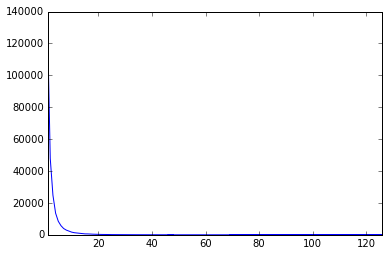

In [76]:
(vps['cust_hash'].value_counts().value_counts()).plot()

In [311]:
vps['cust_hash'].value_counts()>=100

WDQIbzmC5Ek4qjqsDTA+GT+PwNw=         True
weD6LcRH7i9aJkJQud0Q1pxApwM=         True
YCW253rXAow5xq5Zt4fesk5Reds=         True
B6hZpSFDQB5wdELlrFhgm4uWIV8=         True
BGsg0VI2hGxyrSonS5Zm5MtSG2E=         True
zgrCGUHXyDM9hsorycJmARXTcIM=         True
U3uSuKYI8SAlEA509hgYVUfO43o=         True
ZhNYzIbvKuDY66fHJxenKRyHQEU=         True
kBwq1AvrE7Ir26BetWC2JBOUPfU=         True
S2f/rbIPUS2t1yjsJlxd4wuDgE8=         True
5Lmzh2nMhma42jJr3kyN1sc7qrQ=         True
DDwcO5ogwqMSpaaitIY0ZIx0C0Q=         True
8kSVZ9+IbPEHtqWq7Cg8JKvQ4cU=         True
N0zu6AjJ1ZfbOOMiTArVJVje6H0=         True
ObhHg1InvwsbUQBpwTMwDXiYbpQ=         True
ntzOFomw1PTURZyzXE1saa17W+U=         True
9bv7Hi3hgO2o7bspR9I8R0p15jU=         True
pwjbiRnwRtuDAm0bvSDo/OBp/Rk=         True
h0cAX3kzOTwrFCry9exBAxZJMks=         True
6RH83b03t70SLEuGPTfGFGmC7jg=         True
GLbw7aR+LImOtoy3LaU2w127pC4=         True
6er2APCfBI56Db0rO7IdiDbrlkM=         True
+RADYyJWBweP/EGOtx1Hevgp1d0=         True
mO8lAT4bpwEF+pP7dEauzFyNgSw=      

In [250]:
vps[vps['cust_hash'].str.contains('WDQIbzmC5Ek')]

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
667342,686-135-19089,242 ...,2014-01-30,8.03,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Thurs
480692,688-137-365932,557 ...,2014-01-31,13.38,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Fri
201975,686-135-502374,726 ...,2014-02-01,14.54,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Sat
413773,683-115-571619,848 ...,2014-02-02,9.90,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Sun
151585,683-115-622471,917 ...,2014-02-02,5.35,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Sun
219865,687-133-747415,963 ...,2014-02-03,2.98,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Mon
510781,687-133-839601,994 ...,2014-02-03,4.82,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Mon
373821,685-117-899746,1041 ...,2014-02-04,9.19,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Tues
534157,683-115-936121,1124 ...,2014-02-04,5.35,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Tues
342436,688-138-122063,1359 ...,2014-02-06,5.35,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Thurs


In [251]:
JohnDoe=vps[vps['cust_hash'].str.contains('WDQIbzmC5Ek')]

In [245]:
JohnDoe['approved_amount'].sum()

4158.510000000005

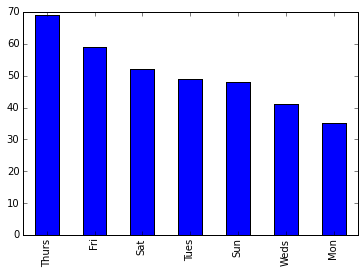

In [254]:
JohnDoe['dayofweek'].value_counts().plot(kind='bar')

In [252]:
JohnDoe.describe(include='all')

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
count,353,353,353,353.000000,353,353,353,353
unique,353,353,315,NaN,1,1,1,7
top,684-171-379987,22187 ...,2014-12-12 00:00:00,NaN,1,USD,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,Thurs
freq,1,1,2,NaN,353,353,353,69
first,NaN,NaN,2014-01-30 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,11.780482,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,4.684532,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2.510000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,9.100000,NaN,NaN,NaN,NaN


In [316]:
JaneDoe=vps[vps['cust_hash'].str.contains('5Lmzh2nMhma42jJr3kyN')]

In [317]:
JaneDoe.describe(include='all')

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
count,154,154,154,154.000000,154,154,154,154
unique,154,154,76,NaN,1,1,1,7
top,688-187-1018258,38879 ...,2015-04-29 00:00:00,NaN,1,USD,5Lmzh2nMhma42jJr3kyN1sc7qrQ=,Fri
freq,1,1,4,NaN,154,154,154,28
first,NaN,NaN,2014-11-19 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.012403,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,11.938271,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-13.030000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,-7.850000,NaN,NaN,NaN,NaN


In [320]:
JaneDoe[JaneDoe['approved_amount']>0].describe(include='all')

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
count,31,31,31,31.000000,31,31,31,31
unique,31,31,31,NaN,1,1,1,7
top,688-187-1018258,34873 ...,2015-03-11 00:00:00,NaN,1,USD,5Lmzh2nMhma42jJr3kyN1sc7qrQ=,Fri
freq,1,1,1,NaN,31,31,31,8
first,NaN,NaN,2014-11-19 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-06-28 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,22.258065,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,5.603378,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN


In [321]:
JaneDoe[JaneDoe['approved_amount']<0].describe(include='all')

,pos_order_id,pos_order_number,pos_order_date,approved_amount,currency_type_id,currency_type_desc,cust_hash,dayofweek
count,123,123,123,123.000000,123,123,123,123
unique,123,123,75,NaN,1,1,1,7
top,686-221-820706,33954 ...,2015-04-29 00:00:00,NaN,1,USD,5Lmzh2nMhma42jJr3kyN1sc7qrQ=,Mon
freq,1,1,3,NaN,123,123,123,22
first,NaN,NaN,2014-11-21 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-5.594228,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.684934,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-13.030000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,-7.930000,NaN,NaN,NaN,NaN


# VPS_CUSTOMER
### Single customer in the VPS system

In [273]:
vps_customer = pd.read_csv('VPS_CUSTOMER_SAMPLE_250K.csv', index_col=0, na_values=True)
vps_customer.head()

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
0,111,lwLEOiIYNERrqhz8ZvZsZTDT59E=,NaN,Customer #7722980 ...,,,N
NaN,116,iZ6heTcPJu8RI6nnQLT8/8ZvJGM=,NaN,Customer #1908771 ...,,,N
2,132,tr1Wt3yT7E2gGbAzhdamfiGv1Lk=,NaN,Customer #35785470 ...,,,N
3,137,T8quedgOKTN9IL6R+CKqr/mZqkk=,NaN,Customer #58138244 ...,,,N
4,247,QAvGWuIl/uwDyhPv42Sk0P5YlzI=,NaN,Customer #27656967 ...,,,N


In [274]:
vps_customer.dtypes

id                     int64
cust_hash             object
cardnum              float64
cust_name             object
subway_profile_id     object
zip                   object
Issubway_card         object
dtype: object

In [275]:
vps_customer['id']=vps_customer['id'].astype(object)
vps_customer['cardnum']=vps_customer['cardnum'].astype(object)
vps_customer.dtypes

id                   object
cust_hash            object
cardnum              object
cust_name            object
subway_profile_id    object
zip                  object
Issubway_card        object
dtype: object

In [276]:
vps_customer.describe(include='all')

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
count,250000,250000,23841,250000,250000,250000,250000
unique,250000,250000,1,250000,1551,646,2
top,8388607,Mr8nvD//VvOeMefiOqg3ZaTiUiQ=,2147483647,Customer #31066675 ...,,,N
freq,1,1,23841,1,248441,249021,226159


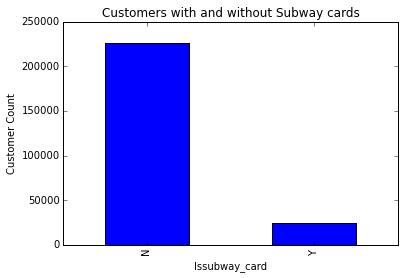

In [277]:
plt.xlabel('Issubway_card')
plt.ylabel('Customer Count')
plt.title('Customers with and without Subway cards')
vps_customer['Issubway_card'].value_counts().plot(kind='bar')

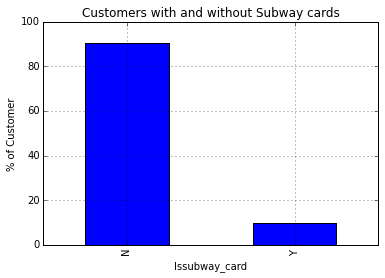

In [278]:
#fig, axs = plt.subplots(1,2)
plt.xlabel('Issubway_card')
plt.ylabel('% of Customer')
plt.title('Customers with and without Subway cards')
temp = vps_customer['Issubway_card'].value_counts()*100/vps_customer['Issubway_card'].count()
temp.plot(kind='bar', grid = True)



In [279]:
vps_customer=vps_customer.sort('zip')

In [290]:
vps_customer['zip']=vps_customer['zip'].astype(object)

In [281]:
vps_customer['zip'].value_counts()

                    249021
10301                    8
11554                    6
10304                    6
11801                    6
11763                    6
07307                    5
10314                    5
11373                    5
06614                    5
12550                    5
10309                    5
11225                    4
10940                    4
11204                    4
12566                    4
11354                    4
08840                    4
12401                    4
11746                    4
12590                    4
07306                    4
11201                    4
11208                    4
11207                    4
11762                    4
10308                    4
07047                    4
11385                    4
11691                    4
                     ...  
07481                    1
77584                    1
60636                    1
07450                    1
10467                    1
11223                    1
6

In [282]:
vps_customer[vps_customer['cust_hash'].str.contains('WDQIbzmC5Ek')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
45833,4421729,WDQIbzmC5Ek4qjqsDTA+GT+PwNw=,NaN,Customer #4319554 ...,,,N


In [283]:
vps_customer[vps_customer['cust_hash'].str.contains('weD6LcRH7i9aJk')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
151593,14686040,weD6LcRH7i9aJkJQud0Q1pxApwM=,NaN,Customer #39074726 ...,,,N


In [284]:
vps_customer[vps_customer['cust_hash'].str.contains('YCW253rXAow5x')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
209146,20267954,YCW253rXAow5xq5Zt4fesk5Reds=,NaN,Customer #11945072 ...,,,N


In [285]:
vps_customer[vps_customer['cust_hash'].str.contains('B6hZpSFDQB5wd')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
128495,12463576,B6hZpSFDQB5wdELlrFhgm4uWIV8=,NaN,Customer #13097740 ...,,,N


In [286]:
vps_customer[vps_customer['cust_hash'].str.contains('BGsg0VI2hGxyrSon')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
19165,1857152,BGsg0VI2hGxyrSonS5Zm5MtSG2E=,NaN,Customer #46983917 ...,,,N


In [287]:
vps_customer[vps_customer['cust_hash'].str.contains('zgrCGUHXyDM9hso')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
12399,1200819,zgrCGUHXyDM9hsorycJmARXTcIM=,NaN,Customer #30060007 ...,,,N


In [288]:
vps_customer[vps_customer['cust_hash'].str.contains('U3uSuKYI8SAlEA509')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
154762,15009298,U3uSuKYI8SAlEA509hgYVUfO43o=,NaN,Customer #64909518 ...,,,N


In [291]:
vps_customer[vps_customer['cust_hash'].str.contains('ZhNYzIbvKuDY66fHJxen')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
116342,11276713,ZhNYzIbvKuDY66fHJxenKRyHQEU=,NaN,Customer #33204052 ...,,,N


In [292]:
vps_customer[vps_customer['cust_hash'].str.contains('kBwq1AvrE7Ir26BetW')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
69231,6715764,kBwq1AvrE7Ir26BetWC2JBOUPfU=,NaN,Customer #842065 ...,,,N


In [293]:
vps_customer[vps_customer['cust_hash'].str.contains('S2f/rbIPUS2t1yjsJlxd4w')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
23536,2282026,S2f/rbIPUS2t1yjsJlxd4wuDgE8=,NaN,Customer #31150273 ...,,,N


In [294]:
vps_customer[vps_customer['cust_hash'].str.contains('5Lmzh2nMhma42jJr3kyN1s')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
131660,12771774,5Lmzh2nMhma42jJr3kyN1sc7qrQ=,2.147484e+09,Customer #36547948 ...,,,Y


In [295]:
vps_customer[vps_customer['cust_hash'].str.contains('DDwcO5ogwqMSpaaitI')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
122094,11843796,DDwcO5ogwqMSpaaitIY0ZIx0C0Q=,NaN,Customer #35867198 ...,,,N


In [297]:
vps_customer[vps_customer['cust_hash'].str.contains('N0zu6AjJ1ZfbOOMiT')]

,id,cust_hash,cardnum,cust_name,subway_profile_id,zip,Issubway_card
98555,9549170,N0zu6AjJ1ZfbOOMiTArVJVje6H0=,NaN,Customer #9150512 ...,,,N


# CUSTOMER_PROFILE
###A customer registered loyalty card

In [99]:
customer_profile = pd.read_csv('CUSTOMER_PROFILE_VPS_CUST_SMP.csv', index_col=0, na_values="...")
customer_profile.head()

,cardID,subway_profile_id,firstName,lastName,birthDate,gender,zipcode
0,2147483647,b11I.ar4F-2-0,Alvin ...,Ho ...,6/23/1990,NaN,...
1,2147483647,b22b.86Ky-2-0,LONILIZA ...,TANAMAL ...,4/16/1973,0,8840
2,2147483647,b21D.1WKA-2-0,April ...,Sander ...,4/3/1964,0,11783
3,2147483647,b12B.1EU7-2-0,Brittany ...,Purcell ...,10/20/1990,0,92392
4,2147483647,b22a.5bjP-2-0,kathy ...,byrne ...,2/1/1971,0,...


In [100]:
customer_profile.shape

(1247, 7)

In [101]:
customer_profile.dtypes

cardID                 int64
subway_profile_id     object
firstName             object
lastName              object
birthDate             object
gender               float64
zipcode               object
dtype: object

In [102]:
customer_profile['cardID']=customer_profile['cardID'].astype(object)
customer_profile['gender']=customer_profile['gender'].astype(object)

In [103]:
customer_profile.describe(include='all')

,cardID,subway_profile_id,firstName,lastName,birthDate,gender,zipcode
count,1247,1247,1247,1247,1064,726,1247
unique,1,916,647,863,782,2,445
top,2147483647,b331.1NhN-2-0,AL ...,H ...,5/10/1960,1,...
freq,1247,24,24,24,24,439,482


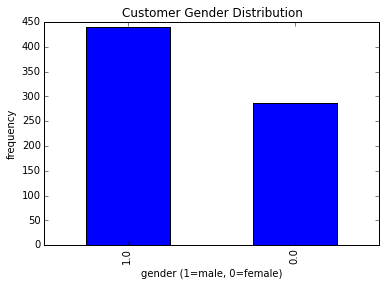

In [104]:
plt.xlabel('gender (1=male, 0=female)')
plt.ylabel('frequency')
plt.title('Customer Gender Distribution')
customer_profile['gender'].value_counts().plot(kind='bar')

In [105]:
from datetime import date
today=date.today()

In [106]:
def calculate_age(birthdayDate, today):
    if pd.isnull(birthdayDate):
        return np.nan
    else:
        return today.year - birthdayDate.year - ((today.month, today.day) < (birthdayDate.month, birthdayDate.day))

In [107]:
customer_profile['birthDate']=pd.to_datetime(customer_profile['birthDate'])

In [108]:
customer_profile['age']=customer_profile['birthDate'].apply(lambda x: calculate_age(x, today))

In [109]:
customer_profile.head()

,cardID,subway_profile_id,firstName,lastName,birthDate,gender,zipcode,age
0,2147483647,b11I.ar4F-2-0,Alvin ...,Ho ...,1990-06-23,NaN,...,25
1,2147483647,b22b.86Ky-2-0,LONILIZA ...,TANAMAL ...,1973-04-16,0,8840,42
2,2147483647,b21D.1WKA-2-0,April ...,Sander ...,1964-04-03,0,11783,51
3,2147483647,b12B.1EU7-2-0,Brittany ...,Purcell ...,1990-10-20,0,92392,25
4,2147483647,b22a.5bjP-2-0,kathy ...,byrne ...,1971-02-01,0,...,44


In [110]:
customer_profile.describe(include='all')

,cardID,subway_profile_id,firstName,lastName,birthDate,gender,zipcode,age
count,1247,1247,1247,1247,1064,726,1247,1064.000000
unique,1,916,647,863,782,2,445,NaN
top,2147483647,b331.1NhN-2-0,AL ...,H ...,1960-05-10 00:00:00,1,...,NaN
freq,1247,24,24,24,24,439,482,NaN
first,NaN,NaN,NaN,NaN,1901-01-30 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2002-08-15 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.717105
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.433741
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000


In [111]:
customer_profile['age'].describe()

count    1064.000000
mean       39.717105
std        14.433741
min        13.000000
25%        28.000000
50%        39.000000
75%        50.000000
max       114.000000
Name: age, dtype: float64

In [40]:
age_bins = pd.qcut(customer_profile.age, 3)
age_bins = pd.qcut(customer_profile.age, [0, .33, .66, 1], labels=["young", "mid-age", "old"], retbins=True)

In [45]:
customer_profile['age_bin']=pd.qcut(customer_profile.age, 3)

In [46]:
customer_profile.head()

,cardID,subway_profile_id,firstName,lastName,birthDate,gender,zipcode,age,age_bin
0,2147483647,b11I.ar4F-2-0,Alvin ...,Ho ...,1990-06-23,NaN,...,25,"[13, 32]"
1,2147483647,b22b.86Ky-2-0,LONILIZA ...,TANAMAL ...,1973-04-16,0,8840,42,"(32, 46]"
2,2147483647,b21D.1WKA-2-0,April ...,Sander ...,1964-04-03,0,11783,51,"(46, 114]"
3,2147483647,b12B.1EU7-2-0,Brittany ...,Purcell ...,1990-10-20,0,92392,25,"[13, 32]"
4,2147483647,b22a.5bjP-2-0,kathy ...,byrne ...,1971-02-01,0,...,44,"(32, 46]"


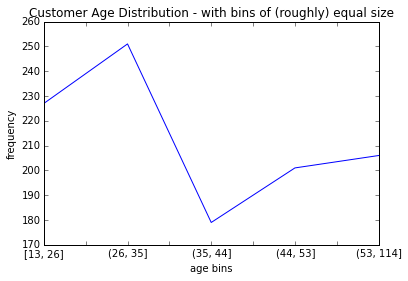

In [117]:
# bins with (roughly) equal size 
plt.xlabel('age bins')
plt.ylabel('frequency')
plt.title('Customer Age Distribution - with bins of (roughly) equal size')
pd.qcut(customer_profile['age'], 5).value_counts(sort=False).plot()

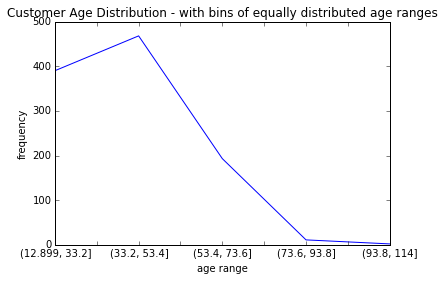

In [118]:
# bins with equally distributed age ranges
plt.xlabel('age range')
plt.ylabel('frequency')
plt.title('Customer Age Distribution - with bins of equally distributed age ranges')
pd.cut(customer_profile['age'], 5).value_counts(sort=False).plot()

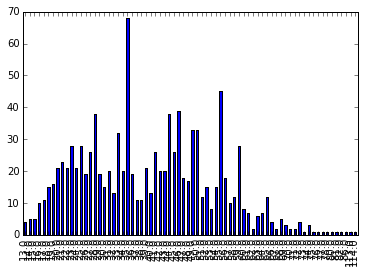

In [112]:
customer_profile['age'].value_counts(sort=False).plot(kind='bar')

In [116]:
(customer_profile['age'].groupby(customer_profile['gender'])).describe()

gender       
0       count    287.000000
        mean      43.289199
        std       12.863321
        min       13.000000
        25%       35.000000
        50%       45.000000
        75%       52.000000
        max       72.000000
1       count    439.000000
        mean      41.756264
        std       14.983013
        min       13.000000
        25%       30.000000
        50%       41.000000
        75%       53.000000
        max      114.000000
dtype: float64

# VPS_POINTS_TXN
### Single loyalty card activity or transaction

In [183]:
vps_points_txn = pd.read_csv('VPS_POINTS_TXN_VPS_CUSTOMER_SMP.csv', index_col=0) 
vps_points_txn.head()

,cardnum,Transaction_Date,store_sat_num,clerk_id,transactionType,transfer_account_from,transfer_account_to,currency,transaction_amount,order_num
0,6277205973592585,2015-02-20,40217-0 ...,,Promotion,,,Points,16,685-190-244576
1,6277205973592585,2013-09-15,custport ...,ThirdParty,Load,,,Points,9,622-101-605299
2,6277205973592585,2015-02-03,40217-0 ...,,Promotion,,,Points,9,685-186-4198158
3,6277205973592585,2012-08-28,27800-0 ...,2,Promotion,,,Points,16,684-26-1151458
4,6277205973592585,2012-12-07,40217-0 ...,1,Redemption,,,Points,-75,688-61-385718


In [184]:
vps_points_txn.shape

(84261, 10)

In [185]:
vps_points_txn.dtypes

cardnum                    int64
Transaction_Date          object
store_sat_num             object
clerk_id                  object
transactionType           object
transfer_account_from     object
transfer_account_to       object
currency                  object
transaction_amount       float64
order_num                 object
dtype: object

In [186]:

vps_points_txn['cardnum']=vps_points_txn['cardnum'].astype(object)

In [187]:
vps_points_txn['Transaction_Date']=pd.to_datetime(vps_points_txn['Transaction_Date'])

In [188]:
vps_points_txn['dayofweek']=vps_points_txn['Transaction_Date'].dt.dayofweek

In [189]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

vps_points_txn['dayofweek'] = vps_points_txn['dayofweek'].apply(lambda x: days[x])

In [190]:
vps_points_txn=vps_points_txn.sort('Transaction_Date')

In [199]:
vps_points_txn.head(20)

,cardnum,Transaction_Date,store_sat_num,clerk_id,transactionType,transfer_account_from,transfer_account_to,currency,transaction_amount,order_num,dayofweek
82480,6277205958807685,2012-08-01,22597-0 ...,20,Redemption,,,Points,-10,686-39-361452,Weds
29327,6277201580840079,2012-08-01,46216-0 ...,1,Promotion,,,Points,24,686-39-380886,Weds
33315,6277201358563713,2012-08-01,13676-0 ...,06,Promotion,,,Points,8,625-38-292376,Weds
68165,6277205621263712,2012-08-01,52011-0 ...,4894,Promotion,,,Points,21,624-40-305707,Weds
60952,6277201344421695,2012-08-01,11381-0 ...,2,Promotion,,,Points,6,685-23-239470,Weds
25460,6277203280341903,2012-08-01,29876-0 ...,4,Redemption,,,Points,-75,685-23-130619,Weds
74751,6277202936088595,2012-08-01,16702-0 ...,5,Promotion,,,Points,6,621-23-162987,Weds
40241,6277203711799992,2012-08-01,44326-0 ...,05,Promotion,,,Points,8,624-40-280089,Weds
56967,6277205958578369,2012-08-01,49057-0 ...,10,Promotion,,,Points,3,686-39-248121,Weds
73244,6277201326543565,2012-08-01,30625-0 ...,10,Promotion,,,Points,7,625-38-323372,Weds


In [173]:
vps_points_txn.describe(include='all')

,cardnum,Transaction_Date,store_sat_num,clerk_id,transactionType,transfer_account_from,transfer_account_to,currency,transaction_amount,order_num
count,8.426100e+04,84261,84261,84261,84261,84261,84261,84261,80866.000000,84261
unique,2.387000e+03,1167,3231,401,15,1423,707,5,NaN,69710
top,6.277206e+15,2015-04-30 00:00:00,mysubwaycardprod ...,,Promotion,,,Points,NaN,
freq,1.833000e+03,212,4435,52795,57128,81434,81434,69125,NaN,6763
first,NaN,2012-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-10-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972368,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.160023,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-657.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


In [174]:
(vps_points_txn['transaction_amount']<=0).sum()

17744

In [175]:
(vps_points_txn['transaction_amount']<0).sum()

16536

In [176]:
(vps_points_txn['transaction_amount']==0).sum()

1208

In [177]:
vps_points_txn['cardnum'].value_counts(sort=False).describe()

count    2387.000000
mean       35.299958
std        64.854183
min         1.000000
25%         5.000000
50%        13.000000
75%        43.000000
max      1833.000000
dtype: float64

In [193]:
vps_points_txn['transactionType'].value_counts()

Promotion                           57128
Redemption                          15679
Load                                 4825
Registration                         2394
Transfer                             1518
Activation                            703
TransferDecrement                     583
Close                                 546
Freeze                                202
Unfreeze                              172
Load Reversal                         161
Redeem Reversal                       114
Positive Adjustment                   113
Expired                                92
Negative Adjustment                    31
dtype: int64

In [200]:
vps_points_txn[vps_points_txn['transactionType']=="Expired"].head()

,cardnum,Transaction_Date,store_sat_num,clerk_id,transactionType,transfer_account_from,transfer_account_to,currency,transaction_amount,order_num,dayofweek


In [201]:
vps_points_txn['currency'].value_counts()

Points                              69125
USD                                 11801
NonMonetar                           3314
Unknown                                13
CAD                                     8
dtype: int64

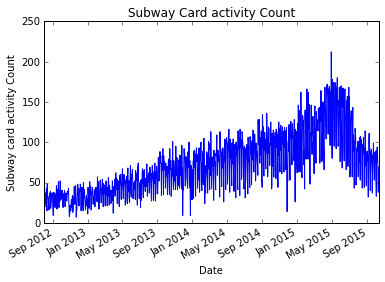

In [203]:
plt.xlabel('Date')
plt.ylabel('Subway card activity Count')
plt.title('Subway Card activity Count')
vps_points_txn['Transaction_Date'].value_counts(sort=False).plot()

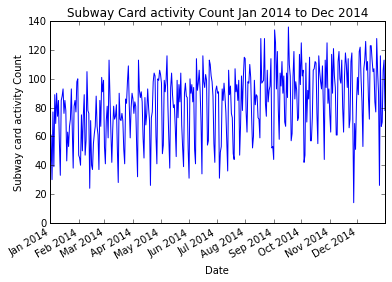

In [179]:
plt.xlabel('Date')
plt.ylabel('Subway card activity Count')
plt.title('Subway Card activity Count Jan 2014 to Dec 2014')
vps_points_txn[(vps_points_txn['Transaction_Date'] >= '20140101') & (vps_points_txn['Transaction_Date'] <='20141231')]['Transaction_Date'].value_counts(sort=False).plot()

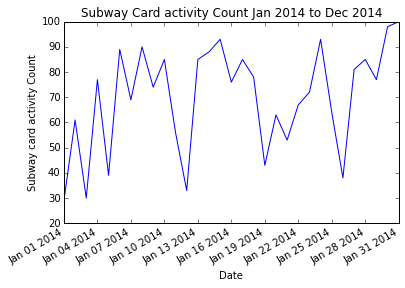

In [180]:
plt.xlabel('Date')
plt.ylabel('Subway card activity Count')
plt.title('Subway Card activity Count Jan 2014 to Dec 2014')
vps_points_txn[(vps_points_txn['Transaction_Date'] >= '20140101') & (vps_points_txn['Transaction_Date'] <='20140131')]['Transaction_Date'].value_counts(sort=False).plot()

# VPS_SUBWAYCARDS_ADDINFO
### First and last recorded activity for a single loyalty card

In [133]:
vps_swcard_addinfo = pd.read_csv('VPS_SWCARD_ADDINFO_VPS_CUST_SMP.csv', index_col=0) 
vps_swcard_addinfo.head()

,cardnum,first_used_date,last_used_date
0,6277205973592585,2012-08-02 17:41:16,2015-08-07 22:08:00
1,6277205875615534,2015-02-08 23:04:25,2015-08-11 22:47:28
2,6299440387053908,2013-12-06 03:32:34,2015-03-29 23:35:21
3,6299440711248109,2014-12-23 20:30:40,2014-12-25 20:06:16
4,6299440126813307,2014-05-01 22:38:41,2015-01-28 20:38:25


In [134]:
vps_swcard_addinfo.shape

(2387, 3)

In [135]:
vps_swcard_addinfo.dtypes

cardnum             int64
first_used_date    object
last_used_date     object
dtype: object

In [136]:
vps_swcard_addinfo['cardnum']=vps_swcard_addinfo['cardnum'].astype(object)

In [137]:
vps_swcard_addinfo['first_used_date']=pd.to_datetime(vps_swcard_addinfo['first_used_date'])

In [138]:
vps_swcard_addinfo['last_used_date']=pd.to_datetime(vps_swcard_addinfo['last_used_date'])

In [139]:
vps_swcard_addinfo['date_diff']=vps_swcard_addinfo['last_used_date']-vps_swcard_addinfo['first_used_date']

In [140]:
vps_swcard_addinfo['date_diff'].describe()

count                         2386
mean     -37 days +11:26:49.473069
std       569 days 16:16:31.232927
min                0 days 00:00:00
25%        70 days 19:53:52.250000
50%       246 days 20:17:07.500000
75%       760 days 17:17:59.750000
max             2598 days 11:27:25
Name: date_diff, dtype: object

In [141]:
vps_swcard_addinfo.dtypes

cardnum                     object
first_used_date     datetime64[ns]
last_used_date      datetime64[ns]
date_diff          timedelta64[ns]
dtype: object

In [142]:
vps_swcard_addinfo=vps_swcard_addinfo.sort('date_diff')

In [148]:
vps_swcard_addinfo.head()

,cardnum,first_used_date,last_used_date,date_diff
956,6277203416909888,2013-12-20 02:13:03,2013-12-20 02:13:03,0 days
1991,6299440684013746,2015-05-02 20:55:47,2015-05-02 20:55:47,0 days
373,6299440157749586,2015-03-09 16:42:41,2015-03-09 16:42:41,0 days
783,6299440431730162,2014-12-10 20:48:46,2014-12-10 20:48:46,0 days
2245,6299440601395846,2014-09-10 19:56:02,2014-09-10 19:56:02,0 days


Key Points
- 

In [214]:
vps_swcard_addinfo[vps_swcard_addinfo['date_diff']<'0 days'].shape

(0, 4)

In [216]:
vps_swcard_addinfo['date_diff'].describe()

count                         2386
mean     -37 days +11:26:49.473069
std       569 days 16:16:31.232927
min                0 days 00:00:00
25%        70 days 19:53:52.250000
50%       246 days 20:17:07.500000
75%       760 days 17:17:59.750000
max             2598 days 11:27:25
Name: date_diff, dtype: object

In [128]:
vps_swcard_addinfo.describe(include='all')

,cardnum,first_used_date,last_used_date,date_diff
count,2.387000e+03,2386,2386,2386
unique,2.387000e+03,2239,2372,NaN
top,6.299440e+15,2015-02-09 18:18:21,2015-07-24 19:37:55,NaN
freq,1.000000e+00,15,5,NaN
first,NaN,2008-07-17 05:05:04,2013-08-27 00:06:07,NaN
last,NaN,2015-07-14 21:07:02,2015-09-01 02:40:35,NaN
mean,NaN,NaN,NaN,-37 days +11:26:49.473069
std,NaN,NaN,NaN,569 days 16:16:31.232927
min,NaN,NaN,NaN,0 days 00:00:00
25%,NaN,NaN,NaN,70 days 19:53:52.250000


In [212]:
vps_swcard_addinfo[vps_swcard_addinfo['date_diff']==760]

,cardnum,first_used_date,last_used_date,date_diff


In [209]:
vps_swcard_addinfo['date_diff'].sum()

Timedelta('-87144 days +00:43:22.742690')

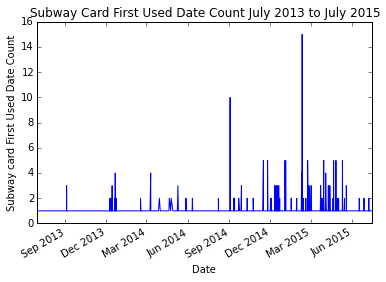

In [152]:
plt.xlabel('Date')
plt.ylabel('Subway card First Used Date Count')
plt.title('Subway Card First Used Date Count July 2013 to July 2015')
vps_swcard_addinfo[(vps_swcard_addinfo['first_used_date'] >= '20130701') & (vps_swcard_addinfo['first_used_date'] <='2015-7-31')]['first_used_date'].value_counts(sort=False).plot()

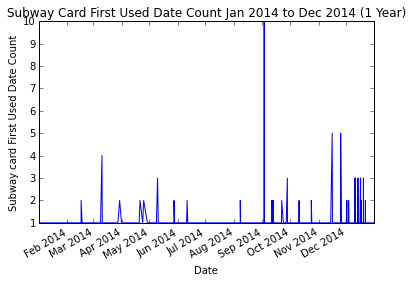

In [150]:
plt.xlabel('Date')
plt.ylabel('Subway card First Used Date Count')
plt.title('Subway Card First Used Date Count Jan 2014 to Dec 2014 (1 Year)')
vps_swcard_addinfo[(vps_swcard_addinfo['first_used_date'] >= '20140101') & (vps_swcard_addinfo['first_used_date'] <='2014-12-31')]['first_used_date'].value_counts(sort=False).plot()

# POS_ORDERSALE_VPS_CUSTOMER_SMP

In [13]:
POS_ORDERSALE_VPS_CUSTOMER_SMP=pd.read_csv('POS_ORDERSALE_VPS_CUSTOMER_SMP.csv', index_col=0)
POS_ORDERSALE_VPS_CUSTOMER_SMP.head()

,MD5KEY_ORDERSALE,OrderSourceTypeId,ChangeReceived,OrderNumber,TaxInclusiveAmount,TaxAmount,TaxExempt,SpmHostOrderCode,MealLocation,TransactionDate,...,EmployeeName,EmployeeId,TerminalNumber,SatelliteNumber,TransactionId,StoreNumber,MessageId,ApplicationVersion,Version,STORE_SAT_NUMBER
0,000006FE72994688C2B00128E98A0FE7,0,0,20979,0,0.32,0,685-205-53977 ...,1,2015-03-26 09:04:13,...,Stephanie ...,10,1,0,20978,23339,1cc071c5-4a66-4139-9ffc-41fc7fa6803e ...,8.1.82.22391 ...,8.0 ...,23339-0 ...
1,000013A70B6C7E15E5B8380F7CE76556,0,0,6773,0,0.66,0,685-204-569156 ...,0,2015-03-21 11:46:18,...,maria ...,5,1,0,6772,39905,543afdbf-5c6b-4eff-a016-bbbe5fd5bca1 ...,8.1.81.21937 ...,8.0 ...,39905-0 ...
2,000020E7F9D7530963879B0C15A49AF7,0,0,2568,0,0.68,0,684-178-3248 ...,1,2015-01-29 21:19:52,...,Diana ...,10,1,0,2568,2941,591f300a-fafc-46bc-a54b-adac838c8e12 ...,8.1.61.21022 ...,...,2941-0 ...
3,00002A586E5F8191261A0944F5C4C855,0,0,45412,0,0.53,0,687-230-1788194 ...,0,2015-05-26 12:24:58,...,Alicia ...,8,2,0,73986,26443,6f8d7e7e-57bc-4eb5-8661-a000ff75541d ...,8.1.110.22691 ...,8.0 ...,26443-0 ...
4,00002ED287213C742AF17E891515D545,0,0,17394,0,0.20,0,688-177-1171876 ...,0,2014-09-17 12:14:17,...,Estefania ...,3,1,0,28705,62296,dcd258ed-e6b7-45ff-8e73-e2bd1ab50db1 ...,8.0.162.18405 ...,...,62296-0 ...


In [14]:
POS_ORDERSALE_VPS_CUSTOMER_SMP.shape

(648474, 22)

In [15]:
POS_ORDERSALE_VPS_CUSTOMER_SMP.dtypes

MD5KEY_ORDERSALE       object
OrderSourceTypeId     float64
ChangeReceived        float64
OrderNumber             int64
TaxInclusiveAmount    float64
TaxAmount             float64
TaxExempt               int64
SpmHostOrderCode       object
MealLocation            int64
TransactionDate        object
BusinessDate           object
EmployeeUserId         object
EmployeeName           object
EmployeeId              int64
TerminalNumber          int64
SatelliteNumber         int64
TransactionId           int64
StoreNumber             int64
MessageId              object
ApplicationVersion     object
Version                object
STORE_SAT_NUMBER       object
dtype: object

In [126]:
POS_ORDERSALE_VPS_CUSTOMER_SMP['OrderSourceTypeId']=POS_ORDERSALE_VPS_CUSTOMER_SMP['OrderSourceTypeId'].astype(object)
POS_ORDERSALE_VPS_CUSTOMER_SMP['OrderNumber']=POS_ORDERSALE_VPS_CUSTOMER_SMP['OrderNumber'].astype(object)
POS_ORDERSALE_VPS_CUSTOMER_SMP['TaxExempt']=POS_ORDERSALE_VPS_CUSTOMER_SMP['TaxExempt'].astype(object)
POS_ORDERSALE_VPS_CUSTOMER_SMP['MealLocation']=POS_ORDERSALE_VPS_CUSTOMER_SMP['MealLocation'].astype(object)
POS_ORDERSALE_VPS_CUSTOMER_SMP['EmployeeId']=POS_ORDERSALE_VPS_CUSTOMER_SMP['EmployeeId'].astype(object)
POS_ORDERSALE_VPS_CUSTOMER_SMP['TerminalNumber']=POS_ORDERSALE_VPS_CUSTOMER_SMP['TerminalNumber'].astype(object)
POS_ORDERSALE_VPS_CUSTOMER_SMP['SatelliteNumber']=POS_ORDERSALE_VPS_CUSTOMER_SMP['SatelliteNumber'].astype(object)
POS_ORDERSALE_VPS_CUSTOMER_SMP['TransactionId']=POS_ORDERSALE_VPS_CUSTOMER_SMP['TransactionId'].astype(object)
POS_ORDERSALE_VPS_CUSTOMER_SMP['StoreNumber']=POS_ORDERSALE_VPS_CUSTOMER_SMP['StoreNumber'].astype(object)

In [128]:
POS_ORDERSALE_VPS_CUSTOMER_SMP['TransactionDate']= pd.to_datetime(POS_ORDERSALE_VPS_CUSTOMER_SMP['TransactionDate'])
POS_ORDERSALE_VPS_CUSTOMER_SMP['BusinessDate']= pd.to_datetime(POS_ORDERSALE_VPS_CUSTOMER_SMP['BusinessDate'])

In [129]:
POS_ORDERSALE_VPS_CUSTOMER_SMP.dtypes

MD5KEY_ORDERSALE              object
OrderSourceTypeId             object
ChangeReceived               float64
OrderNumber                   object
TaxInclusiveAmount           float64
TaxAmount                    float64
TaxExempt                     object
SpmHostOrderCode              object
MealLocation                  object
TransactionDate       datetime64[ns]
BusinessDate          datetime64[ns]
EmployeeUserId                object
EmployeeName                  object
EmployeeId                    object
TerminalNumber                object
SatelliteNumber               object
TransactionId                 object
StoreNumber                   object
MessageId                     object
ApplicationVersion            object
Version                       object
STORE_SAT_NUMBER              object
dtype: object

In [130]:
POS_ORDERSALE_VPS_CUSTOMER_SMP.describe(include='all')

,MD5KEY_ORDERSALE,OrderSourceTypeId,ChangeReceived,OrderNumber,TaxInclusiveAmount,TaxAmount,TaxExempt,SpmHostOrderCode,MealLocation,TransactionDate,...,EmployeeName,EmployeeId,TerminalNumber,SatelliteNumber,TransactionId,StoreNumber,MessageId,ApplicationVersion,Version,STORE_SAT_NUMBER
count,648474,591682,648474.000000,648474,591682.000000,648474.000000,648474,648474,648474,648474,...,648474,648474,648474,648474,648474,648474,648474,648474,648474,648474
unique,648474,6,NaN,111561,NaN,NaN,2,648474,4,632363,...,15400,136,9,2,110099,4070,648474,27,4,4079
top,DA4CA589A464972A6EE12521F7DC1B1A,0,NaN,1099,NaN,NaN,0,624-173-807648 ...,0,2015-04-14 12:15:23,...,Maria ...,4,1,0,1796,48195,2c33257f-5dfd-4a30-9723-31bc495d5ccb ...,8.1.110.22691 ...,8.0 ...,48195-0 ...
freq,1,590778,NaN,37,NaN,NaN,648088,1,458677,4,...,9530,81174,635278,647576,36,1185,1,168393,328590,1185
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-07-01 08:42:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-02 17:18:10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.057255,NaN,0.000267,0.661655,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.080967,NaN,0.032195,0.545676,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,0.000000,0.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# MENUITEM_VPS_CUSTOMER_SMP

In [17]:
MENUITEM_VPS_CUSTOMER_SMP=pd.read_csv('MENUITEM_VPS_CUSTOMER_SMP.csv', index_col=0)

In [18]:
MENUITEM_VPS_CUSTOMER_SMP.head()

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,StoreNumber,TransactionDate,BusinessDate,Store_SAT_Number,TaxInclusiveAmount,TaxAmount,AppliedPromotionId,ModifiedMenuItemId,...,Price,Quantity,ProductivityUnitQuantity,PLU,CategoryDescription,DepartmentDescription,Description,Id,MessageID,PriceOverride
0,EBDED7C67AB5B359033618FCC75D63AA,65A171485B75DF97D8A607F02D91B7AB,56369,2014-10-27 11:41:10,2014-10-27 00:00:00,56369-0 ...,0,0.2475,1177,NaN,...,3.5,1,1,121000004,6 Inch ...,6 Inch Sub ...,Ham 6 inch ...,2,17245e46-4af3-455b-8334-0a22eba0f045 ...,
1,F74C94A7D83C47900CC7ED287A4ADD9A,E8E4EDBD6F8A2AFD39C17D101D3C7369,26036,2014-07-22 12:49:51,2014-07-22 00:00:00,26036-0 ...,0,0.4725,NaN,NaN,...,4.5,1,1,151000123,Pizza ...,Personal Pizza ...,Veggie Pizza ...,272,19d59556-893f-4d9f-974c-f2bf70470ddb ...,
2,763E828F53494FFF8321EDA17600AB96,9CF3851A9AD11D4EBA683A7DF63179EA,3331,2015-07-01 19:05:50,2015-07-01 00:00:00,3331-0 ...,0,0.0760,2099,0,...,1.1,1,0,311000100,Chips ...,Chips ...,Chips ...,277,5a3620c9-5a32-4568-99fa-ca366244c94d ...,F
3,A79535D8AE7AF88C81A4673B0682F661,C695842875A9C7DA23177A4171D84F20,50543,2015-01-08 15:12:18,2015-01-08 00:00:00,50543-0 ...,0,0.0175,NaN,NaN,...,1.6,1,0,212000126,Fountain ...,Fountain Drink 21 oz. ...,21oz Fountain Drink ...,280,7cc0c709-566b-4a81-9147-117027f8b017 ...,
4,36D3649F54DFD87CEDA057711B2FC8E2,760F2880FFF55CB8E58AAF3C382AA0A9,6985,2014-08-19 19:35:18,2014-08-19 00:00:00,6985-0 ...,0,0.0000,NaN,NaN,...,6.5,1,1,111000012,Footlong ...,Footlong Sub ...,Turkey FtLong ...,12,21a8f37e-cf1d-48c4-a509-3903f61fbb8e ...,


In [19]:
MENUITEM_VPS_CUSTOMER_SMP.shape

(1745819, 22)

In [112]:
MENUITEM_VPS_CUSTOMER_SMP.dtypes

MD5KEY_MENUITEM              object
MD5KEY_ORDERSALE             object
StoreNumber                   int64
TransactionDate              object
BusinessDate                 object
Store_SAT_Number             object
TaxInclusiveAmount          float64
TaxAmount                   float64
AppliedPromotionId          float64
ModifiedMenuItemId          float64
AdjustedPrice               float64
DiscountAmount              float64
Price                       float64
Quantity                      int64
ProductivityUnitQuantity    float64
PLU                           int64
CategoryDescription          object
DepartmentDescription        object
Description                  object
Id                            int64
MessageID                    object
PriceOverride                object
dtype: object

In [131]:
MENUITEM_VPS_CUSTOMER_SMP['TransactionDate']= pd.to_datetime(MENUITEM_VPS_CUSTOMER_SMP['TransactionDate'])
MENUITEM_VPS_CUSTOMER_SMP['BusinessDate']= pd.to_datetime(MENUITEM_VPS_CUSTOMER_SMP['BusinessDate'])
MENUITEM_VPS_CUSTOMER_SMP['StoreNumber']=MENUITEM_VPS_CUSTOMER_SMP['StoreNumber'].astype(object)
MENUITEM_VPS_CUSTOMER_SMP['AppliedPromotionId']=MENUITEM_VPS_CUSTOMER_SMP['AppliedPromotionId'].astype(object)
MENUITEM_VPS_CUSTOMER_SMP['ModifiedMenuItemId']=MENUITEM_VPS_CUSTOMER_SMP['ModifiedMenuItemId'].astype(object)
MENUITEM_VPS_CUSTOMER_SMP['Id']=MENUITEM_VPS_CUSTOMER_SMP['Id'].astype(object)

In [132]:
MENUITEM_VPS_CUSTOMER_SMP.describe(include='all')

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,StoreNumber,TransactionDate,BusinessDate,Store_SAT_Number,TaxInclusiveAmount,TaxAmount,AppliedPromotionId,ModifiedMenuItemId,...,Price,Quantity,ProductivityUnitQuantity,PLU,CategoryDescription,DepartmentDescription,Description,Id,MessageID,PriceOverride
count,1745819,1745819,1745819,1745819,1745819,1745819,1599332.000000,1599332.000000,1161453,846066,...,1745819.000000,1745819.000000,1745819.000000,1.745819e+06,1745819,1745819,1745819,1745819,1745819,1745819
unique,1745819,648338,4070,632232,730,4079,NaN,NaN,523,358,...,NaN,NaN,NaN,NaN,21,64,1012,904,648338,5
top,2067CA2694F893D5301AF4642534323C,53ADF617A99C459CC4452E954AAFE82A,48195,2015-05-09 11:48:14,2015-06-25 00:00:00,48195-0 ...,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,Footlong ...,Footlong Sub ...,Chips ...,277,a66eb817-626c-4d4f-a468-8079bf19d37e ...,
freq,1,49,2487,49,9434,2487,NaN,NaN,488306,728427,...,NaN,NaN,NaN,NaN,400249,371346,288439,288439,49,827194
first,NaN,NaN,NaN,2013-07-01 08:42:35,2013-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2015-07-02 17:18:10,2015-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.000098,0.239802,NaN,NaN,...,3.422314,1.064494,0.466653,1.923181e+08,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.019222,0.258976,NaN,NaN,...,3.036287,1.109417,0.498887,8.254210e+07,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,1.110000e+08,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.082800,NaN,NaN,...,1.390000,1.000000,0.000000,1.210000e+08,NaN,NaN,NaN,NaN,NaN,NaN


#POS_PAYMENT_VPS_CUSTOMER_SMP

In [20]:
POS_PAYMENT_VPS_CUSTOMER_SMP = pd.read_csv('POS_PAYMENT_VPS_CUSTOMER_SMP.csv', index_col=0)
POS_PAYMENT_VPS_CUSTOMER_SMP.head(5)

,MD5KEY_ORDERSALE,MD5KEY_PAYMENT,PaymentSourceTypeId,AccountIDLast4,PaymentAmount,Description,CardPurposeTypeId,CardBrandTypeId,MessageID,PaymentMethodTypeId
0,BB5A01A60F9BCAB0BBC9713944E65A39,51112A2142B65D86B2658C3E81468603,0,9876 ...,6.52,VISA ...,2,8,0ac437e8-a590-458b-aa92-e800888ebdc4 ...,2
1,295FB2557F9D6E1E06F1C9272E577DF9,5C2FF72A31566C36D15999ECCDA59A0D,0,2795 ...,6.54,VISA ...,2,8,383b9634-082a-4718-857e-16648d17c7c5 ...,2
2,AF57CC858675A7FFC64062968A390AFB,DCB562F7D4355691A4F117C611B37580,0,3737 ...,11.49,CashCard ...,1,1,533f976c-ab6e-4f52-9ae1-c908d3491712 ...,4
3,B8210991C29A6B386BA080ED83B6BACF,42C22F7893CD5FCF230F4D7531673F27,0,9689 ...,7.20,VISA ...,2,8,a1771972-6b74-4c1a-a0b3-e95d0e9867ce ...,2
4,BCBFF24F47E1110E7C13FB9BDDE755CD,F4DDF6C1A3D44BCC0F03792F2A9EDB10,0,9199 ...,10.07,MasterCard ...,2,7,4c36331e-7ef0-4842-b04b-e4375317325e ...,NaN


In [22]:
POS_PAYMENT_VPS_CUSTOMER_SMP.shape

(618831, 10)

In [21]:
POS_PAYMENT_VPS_CUSTOMER_SMP.dtypes

MD5KEY_ORDERSALE        object
MD5KEY_PAYMENT          object
PaymentSourceTypeId      int64
AccountIDLast4          object
PaymentAmount          float64
Description             object
CardPurposeTypeId        int64
CardBrandTypeId          int64
MessageID               object
PaymentMethodTypeId    float64
dtype: object

In [133]:
POS_PAYMENT_VPS_CUSTOMER_SMP['PaymentSourceTypeId']=POS_PAYMENT_VPS_CUSTOMER_SMP['PaymentSourceTypeId'].astype(object)
POS_PAYMENT_VPS_CUSTOMER_SMP['CardPurposeTypeId']=POS_PAYMENT_VPS_CUSTOMER_SMP['CardPurposeTypeId'].astype(object)
POS_PAYMENT_VPS_CUSTOMER_SMP['CardBrandTypeId']=POS_PAYMENT_VPS_CUSTOMER_SMP['CardBrandTypeId'].astype(object)
POS_PAYMENT_VPS_CUSTOMER_SMP['PaymentMethodTypeId']=POS_PAYMENT_VPS_CUSTOMER_SMP['PaymentMethodTypeId'].astype(object)

In [134]:
POS_PAYMENT_VPS_CUSTOMER_SMP.describe(include='all')

,MD5KEY_ORDERSALE,MD5KEY_PAYMENT,PaymentSourceTypeId,AccountIDLast4,PaymentAmount,Description,CardPurposeTypeId,CardBrandTypeId,MessageID,PaymentMethodTypeId
count,618831,618831,618831,618831,618831.000000,618831,618831,618831,618831,439366
unique,591673,618831,3,10001,NaN,30,3,7,591673,9
top,ACBAC5058BE6E0A8C54BF24B1F5E839E,242D008B303FACCAA1BCEB2AE3638B8A,0,...,NaN,VISA ...,2,8,25030aa2-1667-4f96-8638-d93f4e7118c2 ...,2
freq,26,1,618108,14454,NaN,407133,559054,407133,26,400203
mean,NaN,NaN,NaN,NaN,10.344182,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,11.722640,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.110000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,7.880000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,11.440000,NaN,NaN,NaN,NaN,NaN


#POS_PROMOTION_VPS_CUSTOMER_SMP

In [7]:
POS_PROMOTION_VPS_CUSTOMER_SMP=pd.read_csv('POS_PROMOTION_VPS_CUSTOMER_SMP.csv', index_col=0)
POS_PROMOTION_VPS_CUSTOMER_SMP.head()

,MD5KEY_PROMOTION,MD5KEY_ORDERSALE,Quantity,PromotionType,Description,Id,MessageId
0,000014BFD654B33BB83B0CD89047A3BD,7F59CC32F44EB43058AB9EA10943D98D,1,Percent Off ...,10% Off Any Item ...,189,fdd84376-032d-4306-a375-d0dfeb2d2026 ...
1,000019545EA341283AB0CB7635D50622,51727AE1D9A2FD5F72A142F8B72D34DE,1,Value Meals FVM ...,Fresh Value Meal (21-1) ...,1094,ba0eabfb-132e-4ff6-9a25-c9eab6e83577 ...
2,00004816350395D01340F0D5B8451FBD,C5466CD4E5BB21A836C1FAD8F2A6C43E,1,Value Meals FVM ...,Simple 6 Meal ...,2099,0c58b082-e443-4f7a-8ba8-2f4065aa797d ...
3,00004F52D7B6AF94F62117CDE1A21118,E0E7B039A91213D9D4BE98A3DEBE908A,1,Reward Cards ...,Rewards - Free Chips ...,169,cd5ff438-7bc3-4f14-b27f-4546f91b34c3 ...
4,000061A4D3784A53A332A3EA02FB9996,866DF49B09433954D84F5A6C232FA93F,1,Courtesy ...,Courtesy 10% Off Any Item ...,186,d822d16e-4e4e-48ea-a6be-233174468127 ...


In [8]:
POS_PROMOTION_VPS_CUSTOMER_SMP.shape

(283995, 7)

In [9]:
POS_PROMOTION_VPS_CUSTOMER_SMP.dtypes

MD5KEY_PROMOTION    object
MD5KEY_ORDERSALE    object
Quantity             int64
PromotionType       object
Description         object
Id                   int64
MessageId           object
dtype: object

In [135]:
POS_PROMOTION_VPS_CUSTOMER_SMP['Id']=POS_PROMOTION_VPS_CUSTOMER_SMP['Id'].astype(object)

In [136]:
POS_PROMOTION_VPS_CUSTOMER_SMP.describe(include='all')

,MD5KEY_PROMOTION,MD5KEY_ORDERSALE,Quantity,PromotionType,Description,Id,MessageId
count,283995,283995,283995.000000,283995,283995,283995,283995
unique,283995,254807,NaN,12,423,412,254807
top,D818F032D1AEC54B6420FD4AB09D96EA,B76C6ECFEB6101CA40847372EDDC0CAE,NaN,Value Meals FVM ...,Fresh Value Meal (21-1) ...,1094,527dcdc3-d681-4315-960e-3a7cd4943c81 ...
freq,1,9,NaN,195581,115211,115211,9
mean,NaN,NaN,1.061103,NaN,NaN,NaN,NaN
std,NaN,NaN,0.398746,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


# STORE_RESTAURANT

In [396]:
STORE_RESTAURANT=pd.read_csv('STORE_RESTAURANT.csv', index_col=0)
STORE_RESTAURANT.head()

,STORE_NUMBER,STORE_DAI_NUM,STORE_DAI_SAT_NUM,STORE_ADDRESS1,STORE_ADDRESS2,DISTRIBUTION_REGION,STORE_STATE,STORE_CITY,STORE_ZIP,STORE_TYPE,...,STORE_DC_CD,FAF_MKT_NM,FAF_MKT_CD,STORE_STATUS,STORE_INITIAL_OPEN_DATE,STORE_TEMP_CLOSE_DATE,SUBWAYPOS_LIVE_DATE,STORE_LOYALTY_FLAG,STORE_INITIAL_OPEN_TIME,STORE_TEMP_CLOSE_TIME
0,10020-0 ...,10020,0,. ...,1187 Edgebrook Rd ...,Southwest ...,Texas ...,Houston ...,77034,Traditional ...,...,DIST003,HOUSTON ...,012-0 ...,Open & Operating ...,1991-05-17,2008-09-12,2014-08-13,N,00:00:00,00:00:00
1,10041-0 ...,10041,0,19 Bailey Ave ...,...,Northeast ...,Connecticut ...,Ridgefield ...,6877,Traditional ...,...,DIST038,NEW YORK-NEW JERSEY ...,001-0 ...,Open & Operating ...,1990-11-29,2006-06-13,2015-01-21,Y,00:00:00,00:00:00
2,10055-0 ...,10055,0,4861 N Milwaukee Ave ...,...,Midwest ...,Illinois ...,Chicago ...,60630,Traditional ...,...,DIST235,CHICAGO ...,003-0 ...,Open & Operating ...,1993-10-21,2004-11-14,2014-07-02,N,00:00:00,00:00:00
3,10056-0 ...,10056,0,1400 East 53rd Street ...,Space A ...,Midwest ...,Illinois ...,Chicago ...,60615,Traditional ...,...,DIST235,CHICAGO ...,003-0 ...,Open & Operating ...,1991-09-19,2009-04-07,2014-02-27,N,00:00:00,00:00:00
4,10065-0 ...,10065,0,11629 S Halsted ...,...,Midwest ...,Illinois ...,Chicago ...,60628,Traditional ...,...,DIST235,CHICAGO ...,003-0 ...,Open & Operating ...,1992-02-26,2008-12-12,2014-05-01,N,00:00:00,00:00:00


In [397]:
STORE_RESTAURANT.shape

(4116, 21)

In [398]:
STORE_RESTAURANT.dtypes

STORE_NUMBER               object
STORE_DAI_NUM               int64
STORE_DAI_SAT_NUM           int64
STORE_ADDRESS1             object
STORE_ADDRESS2             object
DISTRIBUTION_REGION        object
STORE_STATE                object
STORE_CITY                 object
STORE_ZIP                   int64
STORE_TYPE                 object
STORE_DC_NAME              object
STORE_DC_CD                object
FAF_MKT_NM                 object
FAF_MKT_CD                 object
STORE_STATUS               object
STORE_INITIAL_OPEN_DATE    object
STORE_TEMP_CLOSE_DATE      object
SUBWAYPOS_LIVE_DATE        object
STORE_LOYALTY_FLAG         object
STORE_INITIAL_OPEN_TIME    object
STORE_TEMP_CLOSE_TIME      object
dtype: object

In [399]:
STORE_RESTAURANT['STORE_DAI_NUM']=STORE_RESTAURANT['STORE_DAI_NUM'].astype(object)
STORE_RESTAURANT['STORE_DAI_SAT_NUM']=STORE_RESTAURANT['STORE_DAI_SAT_NUM'].astype(object)
STORE_RESTAURANT['STORE_ZIP']=STORE_RESTAURANT['STORE_ZIP'].astype(object)
STORE_RESTAURANT['STORE_INITIAL_OPEN_DATE']= pd.to_datetime(STORE_RESTAURANT['STORE_INITIAL_OPEN_DATE'])
STORE_RESTAURANT['STORE_TEMP_CLOSE_DATE']= pd.to_datetime(STORE_RESTAURANT['STORE_TEMP_CLOSE_DATE'])
STORE_RESTAURANT['SUBWAYPOS_LIVE_DATE']= pd.to_datetime(STORE_RESTAURANT['SUBWAYPOS_LIVE_DATE'])

In [400]:
STORE_RESTAURANT.describe(include='all')

,STORE_NUMBER,STORE_DAI_NUM,STORE_DAI_SAT_NUM,STORE_ADDRESS1,STORE_ADDRESS2,DISTRIBUTION_REGION,STORE_STATE,STORE_CITY,STORE_ZIP,STORE_TYPE,...,STORE_DC_CD,FAF_MKT_NM,FAF_MKT_CD,STORE_STATUS,STORE_INITIAL_OPEN_DATE,STORE_TEMP_CLOSE_DATE,SUBWAYPOS_LIVE_DATE,STORE_LOYALTY_FLAG,STORE_INITIAL_OPEN_TIME,STORE_TEMP_CLOSE_TIME
count,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,...,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116
unique,4116,4107,2,4113,806,5,8,1062,1708,19,...,17,5,5,3,3021,1425,529,2,1,1
top,4847-0 ...,29140,0,131 North Broadway ...,...,Western ...,California ...,Houston ...,10019,Traditional ...,...,DIST228,LOS ANGELES ...,002-0 ...,Open & Operating ...,2003-06-25 00:00:00,2999-12-31,2015-01-28 00:00:00,N,00:00:00,00:00:00
freq,1,2,4107,2,2669,1727,1727,247,11,3610,...,903,1242,1242,4058,8,1787,193,3015,4116,4116
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1976-10-29 00:00:00,NaN,2012-10-14 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015-07-13 00:00:00,NaN,2015-07-14 00:00:00,NaN,NaN,NaN


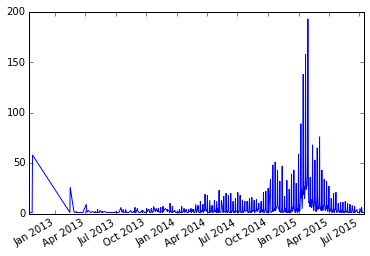

In [403]:
STORE_RESTAURANT['SUBWAYPOS_LIVE_DATE'].value_counts().plot()

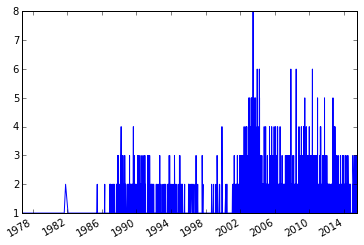

In [404]:
STORE_RESTAURANT['STORE_INITIAL_OPEN_DATE'].value_counts().plot()